# Feature Matching applie to Cereal image

### Feature matching extract defining key features from an input image (using ideas from corner, edge, and contour detection)

**Import library's**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load Cereal Box image**

In [2]:
reeses = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/reeses_puffs.png', 0)

**Create function to display image**

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

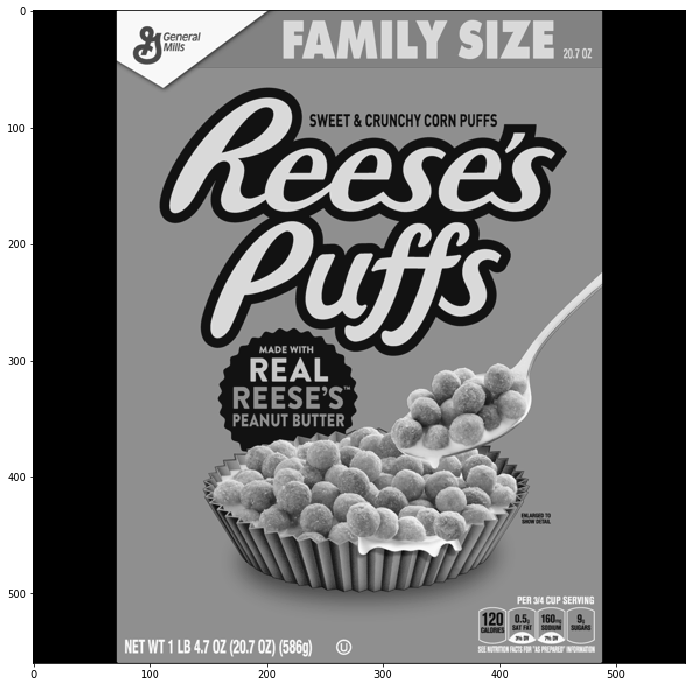

In [4]:
display(reeses)

**Load the target image**

In [5]:
cereals = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/many_cereals.jpg', 0)


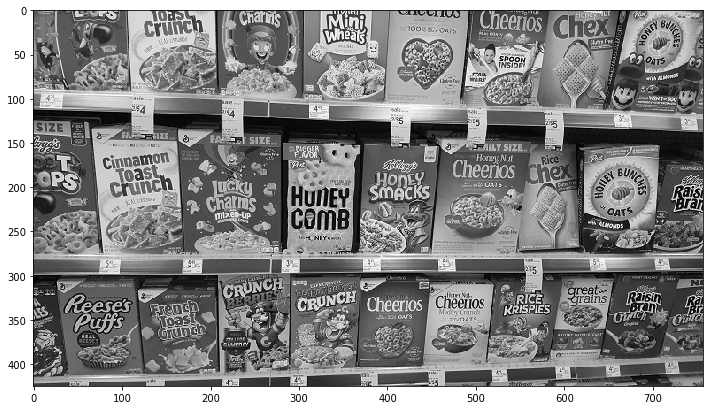

In [6]:
display(cereals)